# Langchain - The LLM Application Framework

## Introduction - What is Langchain?

Langchain is an open source library that provides a standardized and structured interface to build and integrate various components of an LLM Application. Being a model agnostic framework, it is comptabile with models from various LLM providers like OpenAI, HuggingFace and several others. 

Using Langchain allows us to build ("like a chain") reusable components as part of complex multi-step LLM based application in a clear and succint manner. The main components for Lanchain are:

- Prompt Templates
- LLM interface
- Document Retriever
- Agents
- Memory
- Callbacks

*Note*: This is not an exhaustive list of components. There are several others as well. We do not require to use all the components to build an LLM application using Langchain. The simplest Langchain LLM application can be built by just using the LLM interface.

Follow the link to know about all the components: https://python.langchain.com/v0.1/docs/integrations/components/

For the purpose of this tutorial we will focus on the first three components of Langchain. At the end of the notebook, we will also learn about "chaining", one of the most essential features of Langchain.

## Prompt Templates

Prompt Templates - as the name suggestes - provides templates for designing prompts that are fed as inputs to the llm models.
It helps us design templates with multiple inputs, input and output formats that are parameterized and are resuable.

Below is an example on how to use prompt template.

In [1]:
from langchain import PromptTemplate

In [2]:
prompt_template = PromptTemplate.from_template("{planet_name} planet in the solar system is the ")
prompt_langchain = prompt_template.format(planet_name="Mars")

In [3]:
from llama_cpp import Llama 
# Loads the model from the huggingface hub: https://huggingface.co/ssec-uw/OLMo-7B-Instruct-GGUF
olmo = Llama.from_pretrained(repo_id="ssec-uw/OLMo-7B-Instruct-GGUF", filename="OLMo-7B-Instruct-Q4_K_M.gguf", verbose=False)


In [4]:
model_response = olmo(prompt=prompt_langchain, temperature=0.2, max_tokens = 8) # Generate a completion, can also call olmo.create_completion
print(model_response["choices"][0]["text"])



4th planet from the Sun.


In [5]:
prompt_template_2 = PromptTemplate.from_template("{entity_1} of the planet {entity_2} is ")

In [6]:
model_response = olmo(prompt=prompt_template_2.format(entity_1 = "Size",  entity_2 = "Earth"), temperature=0.2, max_tokens = 10) # Generate a completion, can also call olmo.create_completion
print(model_response["choices"][0]["text"])


5,147 km (3,176 miles


## LLM Interface

Langchain provides us a standardized interface for loading the LLM model. Once standardized, we can use the same methods across models from different providers to call/invoke the similar functions that might have different function names.

More importantly, loading the model via Langchain enables us to use the "chaining" feature of Langchain that we will describle below. 

In our example, we will use the OLMo-7B model that we have been using till now. But this time, we will load the model using Langchain's LlamaCpp function.

LlamaCpp helps load and run the model. In our example, it takes gguf file as input(Gpt Generated Unified Format). 

**NOTE**: Do not worry if LlamaCpp and GGUF do not make much sense to you right now. These are just one of the common model loading functions and file formats that are widely used.

https://huggingface.co/ssec-uw/OLMo-7B-Instruct-GGUF
 

In [33]:
from langchain_community.llms import LlamaCpp

# Make sure the model path is correct for your system!
llm = LlamaCpp(
    model_path="../../resources/OLMo-7B-Instruct-Q4_K_M.gguf",
    temperature=0.8,
    max_tokens=20,
    verbose=False,
)

In [34]:
llm.invoke("Jupiter is the largest")

' planet in our solar system and has the most massive atmosphere, which contains a variety of gases. Its'


Now that we have covered the concept of Langchain's Prompt Template and LLM Interface. It is time to learn about one of the most interesting aspects of Langchain - **The "Chain" in Langchain.**


## The "Chaining" in Langchain

Chaining allows us to combine multiple components as described above in series or in parallel to develop a multi-step LLM pipeline.
As shown in the image below, any number of components can be linked together to form a chain.

Let's understand it through an example:


<div>
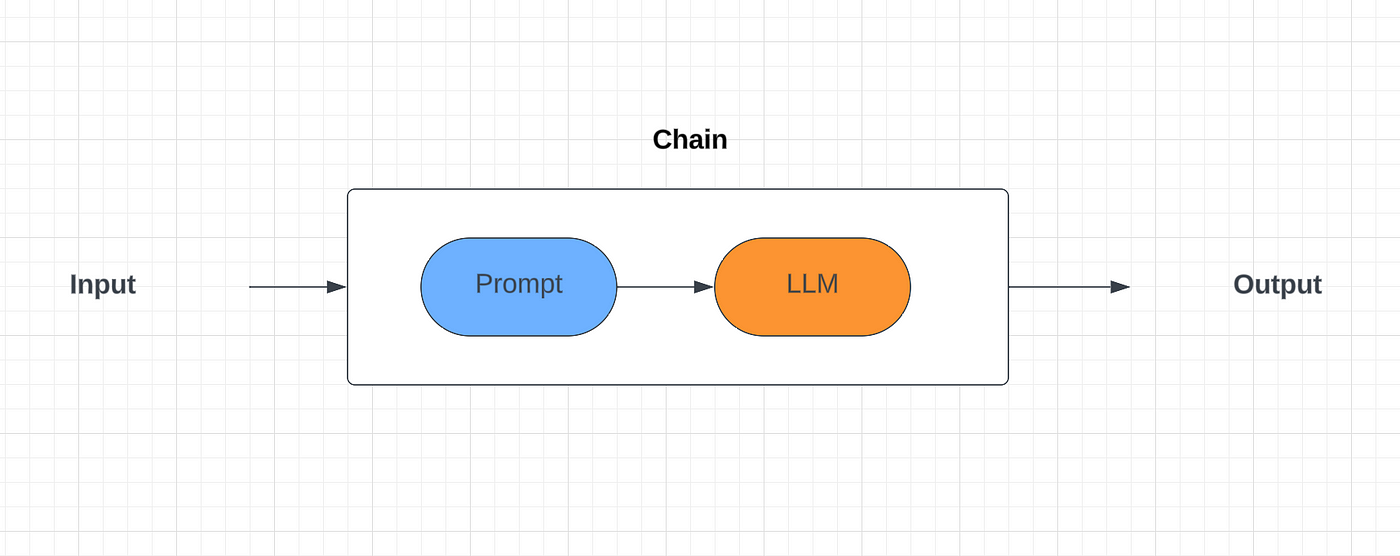
</div>

In [96]:
from langchain.chains import LLMChain
from langchain_core.output_parsers import StrOutputParser

prompt_template = PromptTemplate.from_template("What are {entity_1} and {entity_2}?")
output_parser = StrOutputParser()

chain = LLMChain(llm=llm, prompt=prompt_template, output_parser=output_parser)
chain.invoke({"entity_1": "stars", "entity_2": "moon"})

{'entity_1': 'stars',
 'entity_2': 'moon',
 'text': '\nHow are stars different from the sun?\nWhich one has more mass, a star or a'}

Internally, the chain works like below:

STEP 1: Dictionary is processed as an input to the prompt template.  
STEP 2: Prompt Template reads the variables to form the prompt text as output - "What are stars and moon?"  
STEP 3: The prompt is given as input to the LLM model.  
STEP 4: LLM Model produces output.  
STEP 5: The output goes through StrOutputParser that parses it into string and gives the result.  


<div>
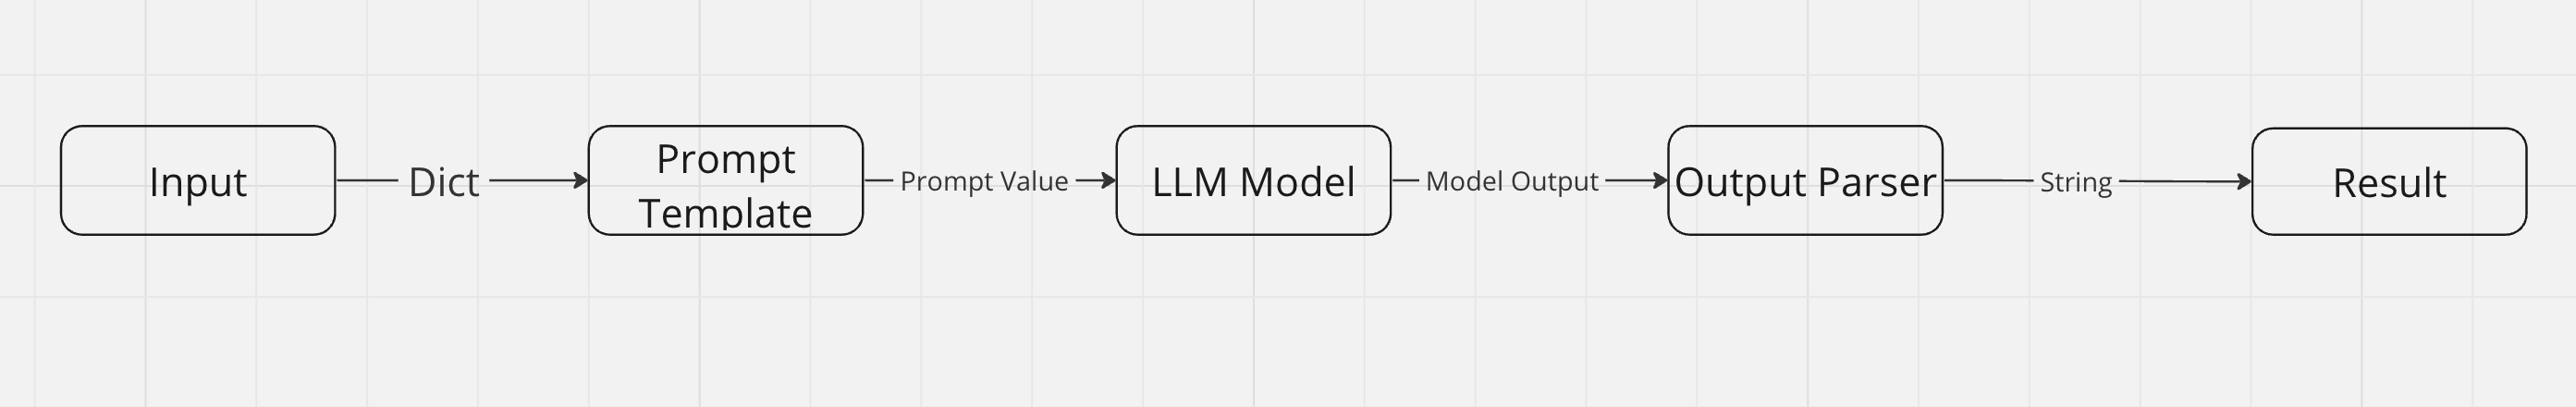
</div>

We can do the same thing using the pipe operator ("|") which is part of the LCEL(Lang Chain Expression Language). The pipe operator is used to sequentialize each component and is similar to the above image.

In [97]:
pipe_chain = prompt_template | llm | output_parser 
pipe_chain.invoke({"entity_1": "stars", "entity_2": "moon"})

'\nStars and the moon are both celestial bodies that appear in the night sky. Stars are'

We can also build more complex pipes using existing pipes. An example shown below:

In [94]:
prompt_template_explain = PromptTemplate.from_template("Summarize the text: {text}")

llm_explain = LlamaCpp(
    model_path="../../resources/OLMo-7B-Instruct-Q4_K_M.gguf",
    temperature=0.2,
    max_tokens=50,
    verbose=False,
)

In [95]:
pipe_chain_adv = prompt_template | llm | prompt_template_explain | llm_explain | output_parser

pipe_chain_adv.invoke({"entity_1": "stars", "entity_2": "moon"})

' made up of gas, while the moon is a large rock that reflects light from the sun. Stars twinkle because they are far away, while the moon does not twinkle because it is close by. The stars and moon are important to many cultures'


Read more about chaining from this article: https://www.analyticsvidhya.com/blog/2023/10/a-comprehensive-guide-to-using-chains-in-langchain/

## Documents Loader


True to its name, Langchain's Document loaders is a tool that helps in loading different kinds of documents (.txt, .pdf, .docx, .csv, .xlsx, .json) and many more into the Langchain comptabile format. The Document Loader even allows YouTube audio parsing and loading as part of unstructured document loading.

Once loaded into the Langchain comptabile format, the document can be pre-processed in different ways as required in the LLM application.  

**Note**: Document Loaders are specifically helpful when you have your own collection of data in a specific format that you want to load into and utlilize in your LLM application. 

There are too many different types of loaders, covering all of them is beyond the scope of this tutorial. 
But surely, we will discuss a few important ones, that are most widely used and will be referenced in the later part of this tutorial.

### TextLoader
This is the simplest kind of document loader, it loads the text document from a filepath.

In [113]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("../README.md")
document = loader.load() ## Returns an array of loaded documents. In this case, array of size 1.

# print(document[0].page_content)
# print(document[0].metadata)

### CSVLoader

A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas.

**Try Out Yourself**: Download any csv file from web, update the filepath below to point to the downloaded file and execute the cell below. What do you see?  
Need Hint? Follow the link: https://python.langchain.com/v0.1/docs/modules/data_connection/document_loaders/csv/

In [ ]:
from langchain_community.document_loaders.csv_loader import CSVLoader

loader = CSVLoader(file_path='/your/file/path.csv')
data = loader.load()

### ArxivLoader

Langchain also provides interface to load documents from ArXiv using the DOI (digital object identifier) number.

In [125]:
## Package Requirements
%pip install arxiv pymupdf --quiet

Note: you may need to restart the kernel to use updated packages.


In [127]:
from langchain_community.document_loaders import ArxivLoader

arxiv_doi = "2405.10195"
docs = ArxivLoader(query=arxiv_doi).load()

print(docs[0].metadata)
# print(docs[0].page_content)

{'Published': '2024-05-16', 'Title': 'Formation pathways of the compact stellar systems', 'Authors': 'J. K. Jang, Sukyoung K. Yi, Soo-Chang Rey, Jinsu Rhee, Yohan Dubois, Taysun Kimm, Christophe Pichon, Katarina Kraljic, Suk Kim', 'Summary': "The formation pathways of compact stellar systems (CSSs) are still under\ndebate. We utilize the \\NH\\ simulation to investigate the origins of such\nobjects in the field environment. We identified 55 CSS candidates in the\nsimulation whose properties are similar to those of the observed ultra-compact\ndwarfs and compact ellipticals. All but two most massive objects (compact\nelliptical candidates) are a result of a short starburst. Sixteen are formed by\ntidal stripping, while the other 39 are intrinsically compact from their birth.\nThe stripped objects originate from dwarf-like galaxies with a dark halo, but\nmost of their dark matter is stripped through their orbital motion around a\nmore massive neighbor galaxy. The 39 intrinsically compact 

### Use Cases for Document Loaders: 
If you have a collection of research papers, that you want to use and leverage into your LLM application, 'ArxivLoader' can help you load these papers into your application as shown in the example below.

Once loaded, you can ask the LLM model to summarize or answer questions based on these documents. 

Fascinating, isn't? 
Stay Tuned to learn how to do it as we cover that in the susbequent notebooks.

## References:
https://python.langchain.com/v0.1/docs/modules/data_connection/document_loaders/  
https://dev.to/rutamstwt/langchain-document-loading-36j3  
https://docs.kanaries.net/topics/LangChain/langchain-document-loader  
https://medium.com/@varsha.rainer/document-loaders-in-langchain-7c2db9851123  
